In [1]:
import cv2,os
import random
from tensorflow.keras.optimizers import Adam 
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras import layers
import plotly.graph_objects as go
from tensorflow.keras.applications import MobileNetV2
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.models import Model
from keras.applications.vgg16 import VGG16 
from keras.applications.vgg19 import VGG19  
from tensorflow.keras.applications import mobilenet_v2
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score,f1_score, confusion_matrix
from keras.layers import Conv2D, Dense, MaxPooling2D, Activation, Dropout, Flatten,InputLayer
from tensorflow .keras.preprocessing.image import img_to_array,load_img
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from keras.applications.inception_v3 import InceptionV3
from sklearn.metrics import accuracy_score
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import image
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import load_img
from keras.utils.np_utils import to_categorical
import pickle
from keras.layers import Conv2D, Dense, MaxPooling2D, Activation, Dropout, Flatten,InputLayer
from keras.models import Sequential
from keras.layers.advanced_activations import LeakyReLU

In [2]:
smoking = image.load_img("dataset/training_data/smoking/smoking_0001.jpg")
notsmoking = image.load_img("dataset/training_data/notsmoking/notsmoking_0001.JPG")

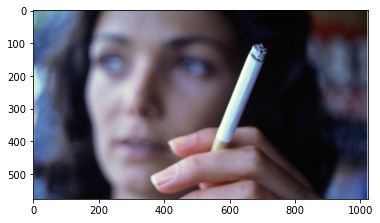

In [3]:
plt.imshow(smoking)#plt.imshow للتصغير 

In [4]:
np.array(smoking)

array([[[255, 255, 248],
        [231, 245, 245],
        [136, 168, 179],
        ...,
        [ 35,  31,  28],
        [206, 202, 199],
        [255, 251, 250]],

       [[254, 255, 247],
        [231, 245, 245],
        [138, 170, 181],
        ...,
        [ 36,  32,  29],
        [207, 203, 200],
        [255, 251, 250]],

       [[254, 255, 249],
        [233, 245, 245],
        [140, 172, 183],
        ...,
        [ 36,  32,  29],
        [207, 203, 200],
        [255, 252, 251]],

       ...,

       [[247, 255, 248],
        [227, 240, 255],
        [116, 129, 181],
        ...,
        [ 55,  61, 121],
        [200, 206, 230],
        [249, 255, 255]],

       [[246, 255, 247],
        [226, 239, 255],
        [115, 128, 180],
        ...,
        [ 55,  61, 121],
        [200, 206, 230],
        [249, 255, 255]],

       [[245, 255, 246],
        [225, 238, 254],
        [114, 127, 179],
        ...,
        [ 55,  61, 121],
        [200, 206, 230],
        [249, 255, 255]]

In [5]:
np.array(smoking).shape

(576, 1024, 3)

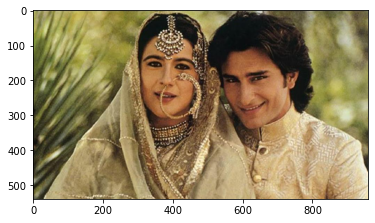

In [6]:
plt.imshow(notsmoking)

In [7]:
cv2.imread('dataset/training_data/smoking/smoking_0001.jpg').shape

(576, 1024, 3)

In [8]:
data_path =r'C:\Users\sa-ha\Downloads\dataset\training_data'
CATEGORIES = ['smoking','notsmoking']

In [9]:
training_data = []
IMG_SIZE=128

def trian_dataset():
    for category in CATEGORIES:
        path = os.path.join(data_path, category) # path to our data
        class_num = CATEGORIES.index(category)# classifcation index
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) # resizing our imgz
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
trian_dataset()

In [10]:
print(len(training_data))

5551


In [11]:
import random
random.shuffle(training_data)
train_data, labels_data = zip(*training_data)

In [12]:
for Sample in training_data[:10]:
    print(Sample[1])

0
1
1
0
1
0
0
1
1
0


In [13]:
X=[]
y=[]
for features, label in training_data:
    X.append(features)
    y.append(label)
X = np.array(X)# reshape
y = to_categorical(y, num_classes = 2)

In [14]:
X.shape,y.shape

((5551, 128, 128, 3), (5551, 2))

In [15]:
def display_random_set(data, labels, classes):
    plt.figure(figsize=(15, 15))
    for i in range(10):
        plt.subplot(5, 5, (i+1))
        random_val = np.random.randint(low=0, high=len(data))
        img = data[random_val]
        plt.imshow(img)
        plt.axis(False)
        plt.title(classes[np.argmax(labels[random_val])])
    plt.show()

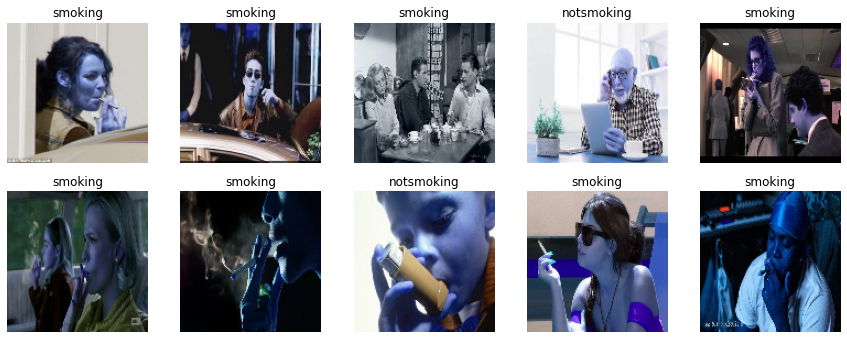

In [16]:
display_random_set(data=X, labels=y, classes=CATEGORIES)

In [17]:
#nsample,nx,ny,ni=X.shape
#X1=X.reshape(nsample,nx*ny*ni)
#print(X1.shape)

In [18]:
X_train, X_val, y_train, y_val= train_test_split(X, y, test_size=.2, random_state=42)

# Convolutional Neural Networks (CNN)

In [19]:
model = Sequential()

model.add(InputLayer(input_shape=(128, 128, 3)))

model.add(Conv2D(32, 3, activation='relu'))   
model.add(MaxPooling2D())
model.add(Conv2D(32, 3, activation='relu'))   
model.add(MaxPooling2D())
model.add(Conv2D(32, 3, activation='relu'))  
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(2 , activation = 'softmax'))   

In [20]:
model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0

In [21]:
M = model.fit(X_train, y_train, validation_data=(X_val,y_val),epochs=10,batch_size=64)  

Epoch 1/10
70/70 [==============================] - 49s 686ms/step - loss: 9.9723 - accuracy: 0.5968 - val_loss: 0.6609 - val_accuracy: 0.6193
Epoch 2/10
70/70 [==============================] - 49s 699ms/step - loss: 0.5566 - accuracy: 0.6955 - val_loss: 0.6574 - val_accuracy: 0.6634
Epoch 3/10
70/70 [==============================] - 49s 700ms/step - loss: 0.4413 - accuracy: 0.7730 - val_loss: 0.6858 - val_accuracy: 0.6706
Epoch 4/10
70/70 [==============================] - 45s 648ms/step - loss: 0.3615 - accuracy: 0.8209 - val_loss: 0.8099 - val_accuracy: 0.7003
Epoch 5/10
70/70 [==============================] - 46s 654ms/step - loss: 0.2780 - accuracy: 0.8723 - val_loss: 0.8003 - val_accuracy: 0.7093
Epoch 6/10
70/70 [==============================] - 46s 654ms/step - loss: 0.2673 - accuracy: 0.8791 - val_loss: 0.8811 - val_accuracy: 0.7012
Epoch 7/10
70/70 [==============================] - 46s 651ms/step - loss: 0.2016 - accuracy: 0.9095 - val_loss: 1.0488 - val_accuracy: 0.7165

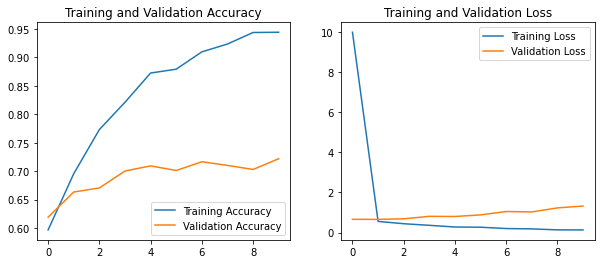

In [22]:
acc = M.history['accuracy']
val_acc = M.history['val_accuracy']

loss = M.history['loss']
val_loss = M.history['val_loss']

epochs=10
epochs_range = range(epochs)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy') 
plt.plot(epochs_range, val_acc, label='Validation Accuracy')  
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

In [37]:
model_10= Sequential()
model_10.add(InputLayer(input_shape=(128, 128,3)))
model_10.add(Conv2D(32, 3, activation='linear'))
model_10.add(LeakyReLU(alpha=0.1))
model_10.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model_10.add(Conv2D(64, 3, activation='linear')) 
model_10.add(LeakyReLU(alpha=0.1))
model_10.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model_10.add(Conv2D(128, 3, activation='linear')) 
model_10.add(LeakyReLU(alpha=0.1))
model_10.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model_10.add(Flatten())
model_10.add(Dense(128, activation='linear'))
model_10.add(Dropout(.05))  
model_10.add(Dense(2 , activation = 'softmax'))  
model_10.compile(optimizer='adam',loss="binary_crossentropy",metrics=['accuracy'])

In [38]:
M_10=model_10.fit(X_train, y_train, batch_size=70, epochs=10, validation_data=(X_val,y_val))

Epoch 1/10
64/64 [==============================] - 78s 1s/step - loss: 72.0792 - accuracy: 0.5736 - val_loss: 2.4247 - val_accuracy: 0.6724
Epoch 2/10
64/64 [==============================] - 76s 1s/step - loss: 1.8880 - accuracy: 0.6950 - val_loss: 1.5457 - val_accuracy: 0.6652
Epoch 3/10
64/64 [==============================] - 74s 1s/step - loss: 0.8901 - accuracy: 0.7845 - val_loss: 0.9744 - val_accuracy: 0.7246
Epoch 4/10
64/64 [==============================] - 71s 1s/step - loss: 0.5077 - accuracy: 0.8466 - val_loss: 0.8258 - val_accuracy: 0.7408
Epoch 5/10
64/64 [==============================] - 74s 1s/step - loss: 0.3588 - accuracy: 0.8930 - val_loss: 1.0952 - val_accuracy: 0.7480
Epoch 6/10
64/64 [==============================] - 74s 1s/step - loss: 0.2200 - accuracy: 0.9349 - val_loss: 0.9983 - val_accuracy: 0.7399
Epoch 7/10
64/64 [==============================] - 74s 1s/step - loss: 0.1325 - accuracy: 0.9651 - val_loss: 0.9584 - val_accuracy: 0.7795
Epoch 8/10
64/64 [=

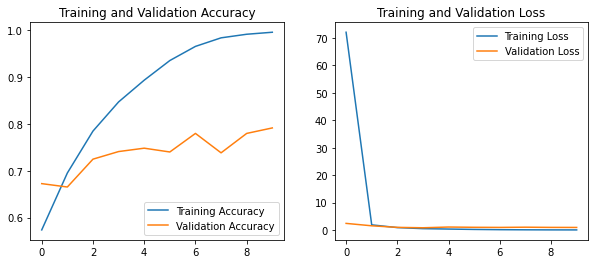

In [39]:
acc = M_10.history['accuracy']
val_acc = M_10.history['val_accuracy']

loss = M_10.history['loss']
val_loss = M_10.history['val_loss']

epochs=10
epochs_range = range(epochs)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy') 
plt.plot(epochs_range, val_acc, label='Validation Accuracy')  
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss');

# Model Transfer Learning

MobileNetV2

In [44]:
from tensorflow.keras.applications import mobilenet_v2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model




model_1= mobilenet_v2.MobileNetV2(weights='imagenet', include_top=False, input_shape=(128,128,3)) 
 
for layer in model_1.layers:
    layer.trainable = False    

x = model_1.output
x = Flatten(name = "flatten")(x) 
x = Dense(100, activation='relu')(x) 
x = Dense(128, activation='relu')(x)
x= Dropout(0.5)(x)
x = Dense(2, activation='softmax')(x) 

model_1 = Model(inputs=model_1.input, outputs=x)
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_1.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_12 (InputLayer)          [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 64, 64, 32)   864         ['input_12[0][0]']               
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 64, 64, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 64, 64, 32)   0           ['bn_Conv1[0][0]']         

In [45]:
O=model.fit(X_train, y_train, validation_data=(X_val,y_val),epochs=10)


Epoch 1/10
139/139 [==============================] - 48s 348ms/step - loss: 0.0174 - accuracy: 0.9944 - val_loss: 2.9449 - val_accuracy: 0.7381
Epoch 2/10
139/139 [==============================] - 47s 340ms/step - loss: 0.0088 - accuracy: 0.9980 - val_loss: 3.0152 - val_accuracy: 0.7390
Epoch 3/10
139/139 [==============================] - 47s 341ms/step - loss: 0.0066 - accuracy: 0.9980 - val_loss: 3.2160 - val_accuracy: 0.7327
Epoch 4/10
139/139 [==============================] - 48s 346ms/step - loss: 0.0094 - accuracy: 0.9971 - val_loss: 3.0708 - val_accuracy: 0.7381
Epoch 5/10
139/139 [==============================] - 49s 351ms/step - loss: 0.0673 - accuracy: 0.9809 - val_loss: 3.7854 - val_accuracy: 0.7147
Epoch 6/10
139/139 [==============================] - 51s 366ms/step - loss: 0.1191 - accuracy: 0.9667 - val_loss: 2.7680 - val_accuracy: 0.6994
Epoch 7/10
139/139 [==============================] - 49s 355ms/step - loss: 0.1071 - accuracy: 0.9658 - val_loss: 2.5870 - val_ac

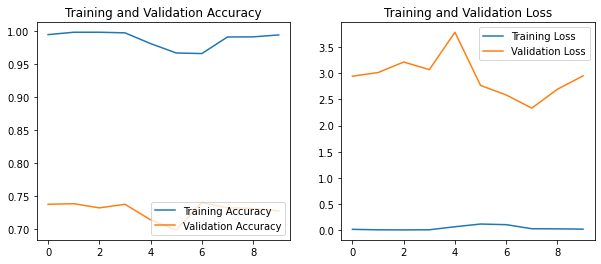

In [46]:
acc = O.history['accuracy']
val_acc = O.history['val_accuracy']

loss = O.history['loss']
val_loss = O.history['val_loss']

epochs=10
epochs_range = range(epochs)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy') 
plt.plot(epochs_range, val_acc, label='Validation Accuracy')  
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

# vgg19

In [19]:
vgg19 = VGG19(weights='imagenet',include_top=False,input_shape=(128,128,3))

for layer in vgg19.layers:
    layer.trainable = False
    
model = vgg19.output

model = Flatten(name = "flatten")(model)
model = Dense(2,activation='sigmoid')(model)
model = Dense(100, activation='relu')(model) 
model = Dense(128, activation='relu')(model)
model= Dropout(0.5)(model)
model = Dense(2, activation='softmax')(model)

vgg19 = Model(inputs=vgg19.input, outputs=model)
vgg19.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
vgg19.summary()






Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [20]:
D=vgg19.fit(X_train, y_train, validation_data=(X_val,y_val),epochs=10)

Epoch 1/10
139/139 [==============================] - 522s 4s/step - loss: 0.6294 - accuracy: 0.6696 - val_loss: 0.5748 - val_accuracy: 0.7012
Epoch 2/10
139/139 [==============================] - 17422s 126s/step - loss: 0.5725 - accuracy: 0.7234 - val_loss: 0.5733 - val_accuracy: 0.7309
Epoch 3/10
139/139 [==============================] - 459s 3s/step - loss: 0.5492 - accuracy: 0.7606 - val_loss: 0.5226 - val_accuracy: 0.7840
Epoch 4/10
139/139 [==============================] - 401s 3s/step - loss: 0.5386 - accuracy: 0.7606 - val_loss: 0.5515 - val_accuracy: 0.7462
Epoch 5/10
139/139 [==============================] - 349s 3s/step - loss: 0.5012 - accuracy: 0.7892 - val_loss: 0.4917 - val_accuracy: 0.8056
Epoch 6/10
139/139 [==============================] - 351s 3s/step - loss: 0.4868 - accuracy: 0.7964 - val_loss: 0.4999 - val_accuracy: 0.7885
Epoch 7/10
139/139 [==============================] - 357s 3s/step - loss: 0.4799 - accuracy: 0.7989 - val_loss: 0.4890 - val_accuracy: 0.

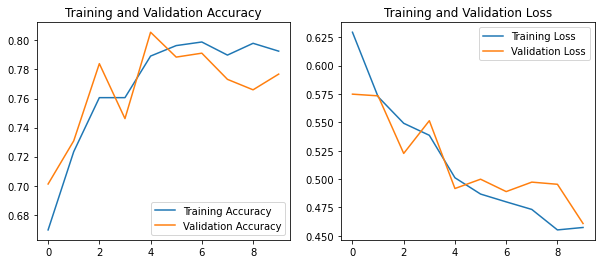

In [21]:
acc = D.history['accuracy']
val_acc = D.history['val_accuracy']

loss = D.history['loss']
val_loss = D.history['val_loss']

epochs=10
epochs_range = range(epochs)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy') 
plt.plot(epochs_range, val_acc, label='Validation Accuracy')  
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

In [19]:
model3= VGG19(weights='imagenet',include_top=False,input_shape=(128,128,3))

for layer in model3.layers:
    layer.trainable = False
    
A1 = model3.output

A1= Flatten(name = "flatten")(A1)
A1 = Dense(2,activation='sigmoid')(A1)
A1 = Dense(32,activation='sigmoid')(A1)
A1 = Dense(64, activation='relu')(A1) 
A1 = Dense(100, activation='relu')(A1)
A1 = Dense(128, activation='relu')(A1)
A1= Dropout(0.5)(A1)
A1 = Dense(2, activation='sigmoid')(A1)

model3 = Model(inputs=model3.input, outputs=A1)
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model3.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [20]:
L1=model3.fit(X_train, y_train, validation_data=(X_val,y_val),epochs=10,batch_size=64)

Epoch 1/10
70/70 [==============================] - 511s 7s/step - loss: 0.6770 - accuracy: 0.5818 - val_loss: 0.6499 - val_accuracy: 0.5878
Epoch 2/10
70/70 [==============================] - 523s 7s/step - loss: 0.5641 - accuracy: 0.7232 - val_loss: 0.5025 - val_accuracy: 0.7723
Epoch 3/10
70/70 [==============================] - 504s 7s/step - loss: 0.4921 - accuracy: 0.7856 - val_loss: 0.5382 - val_accuracy: 0.7669
Epoch 4/10
70/70 [==============================] - 503s 7s/step - loss: 0.4654 - accuracy: 0.8016 - val_loss: 0.5076 - val_accuracy: 0.7786
Epoch 5/10
70/70 [==============================] - 473s 7s/step - loss: 0.4548 - accuracy: 0.8092 - val_loss: 0.4972 - val_accuracy: 0.7696
Epoch 6/10
70/70 [==============================] - 500s 7s/step - loss: 0.4277 - accuracy: 0.8126 - val_loss: 0.4498 - val_accuracy: 0.7948
Epoch 7/10
70/70 [==============================] - 511s 7s/step - loss: 0.4188 - accuracy: 0.8300 - val_loss: 0.4880 - val_accuracy: 0.7858
Epoch 8/10
70

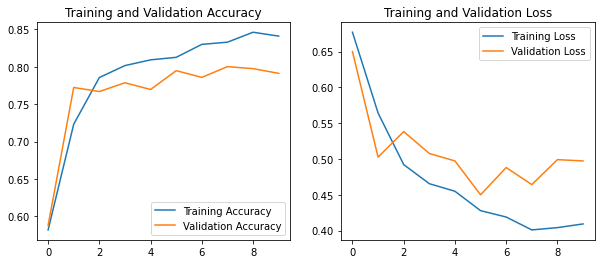

In [21]:
acc = L1.history['accuracy']
val_acc = L1.history['val_accuracy']

loss = L1.history['loss']
val_loss = L1.history['val_loss']

epochs=10
epochs_range = range(epochs)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy') 
plt.plot(epochs_range, val_acc, label='Validation Accuracy')  
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

In [22]:
model4= VGG19(weights='imagenet',include_top=False,input_shape=(128,128,3))

for layer in model4.layers:
    layer.trainable = False
    
A2 = model4.output

A2= Flatten(name = "flatten")(A2)
A2 = Dense(32,activation='relu')(A2)
A2 = Dense(64, activation='relu')(A2) 
A2 = Dense(128, activation='relu')(A2)
A2 = Dense(128, activation='relu')(A2)
A2= Dropout(0.8)(A2)
A2 = Dense(2, activation='sigmoid')(A2)

model4 = Model(inputs=model4.input, outputs=A2)
model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
L2=model4.fit(X_train, y_train, validation_data=(X_val,y_val),epochs=10,batch_size=64)

Epoch 1/10
70/70 [==============================] - 316s 5s/step - loss: 0.9381 - accuracy: 0.6495 - val_loss: 0.5126 - val_accuracy: 0.7885
Epoch 2/10
70/70 [==============================] - 357s 5s/step - loss: 0.4864 - accuracy: 0.7950 - val_loss: 0.4385 - val_accuracy: 0.8065
Epoch 3/10
70/70 [==============================] - 349s 5s/step - loss: 0.3630 - accuracy: 0.8592 - val_loss: 0.4190 - val_accuracy: 0.8218
Epoch 4/10
70/70 [==============================] - 352s 5s/step - loss: 0.2665 - accuracy: 0.8923 - val_loss: 0.4418 - val_accuracy: 0.8299
Epoch 5/10
70/70 [==============================] - 349s 5s/step - loss: 0.1701 - accuracy: 0.9297 - val_loss: 0.4703 - val_accuracy: 0.8344
Epoch 6/10
70/70 [==============================] - 350s 5s/step - loss: 0.1481 - accuracy: 0.9399 - val_loss: 0.7178 - val_accuracy: 0.8308
Epoch 7/10
70/70 [==============================] - 351s 5s/step - loss: 0.1093 - accuracy: 0.9523 - val_loss: 0.8363 - val_accuracy: 0.8461
Epoch 8/10
70

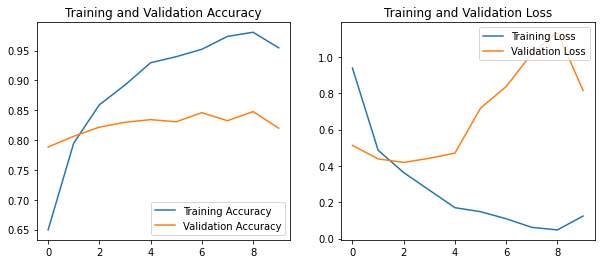

In [24]:
acc = L2.history['accuracy']
val_acc = L2.history['val_accuracy']

loss = L2.history['loss']
val_loss = L2.history['val_loss']

epochs=10
epochs_range = range(epochs)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy') 
plt.plot(epochs_range, val_acc, label='Validation Accuracy')  
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

In [40]:

model5= VGG16(weights='imagenet',include_top=False,input_shape=(128,128,3))

for layer in model5.layers:
    layer.trainable = False
    
A3 = model5.output

A3= Flatten(name = "flatten")(A3)
A3 = Dense(32,activation='relu')(A3)
A3 = Dense(64, activation='relu')(A3) 
A3 = Dense(128, activation='relu')(A3)
A3 = Dense(128, activation='relu')(A3)
A3= Dropout(0.8)(A3)
A3 = Dense(2, activation='sigmoid')(A3)

model5 = Model(inputs=model5.input, outputs=A3)
model5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [42]:
L4=model5.fit(X_train, y_train, validation_data=(X_val,y_val),epochs=10,batch_size=64)

Epoch 1/10
70/70 [==============================] - 261s 4s/step - loss: 0.9986 - accuracy: 0.6054 - val_loss: 0.5906 - val_accuracy: 0.7318
Epoch 2/10
70/70 [==============================] - 281s 4s/step - loss: 0.5693 - accuracy: 0.7405 - val_loss: 0.4899 - val_accuracy: 0.7957
Epoch 3/10
70/70 [==============================] - 294s 4s/step - loss: 0.4050 - accuracy: 0.8293 - val_loss: 0.4634 - val_accuracy: 0.8200
Epoch 4/10
70/70 [==============================] - 289s 4s/step - loss: 0.3155 - accuracy: 0.8608 - val_loss: 0.4786 - val_accuracy: 0.8272
Epoch 5/10
70/70 [==============================] - 281s 4s/step - loss: 0.2329 - accuracy: 0.8912 - val_loss: 0.5475 - val_accuracy: 0.8110
Epoch 6/10
70/70 [==============================] - 283s 4s/step - loss: 0.1793 - accuracy: 0.9052 - val_loss: 0.8217 - val_accuracy: 0.8128
Epoch 7/10
70/70 [==============================] - 281s 4s/step - loss: 0.1505 - accuracy: 0.9146 - val_loss: 0.7535 - val_accuracy: 0.8182
Epoch 8/10
70

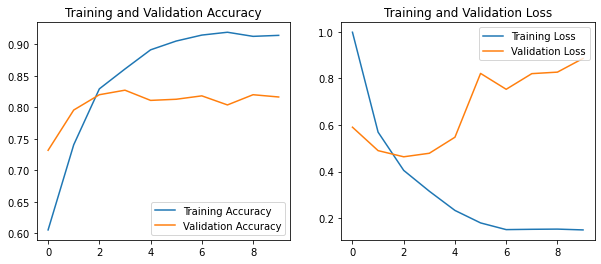

In [43]:
acc = L4.history['accuracy']
val_acc = L4.history['val_accuracy']

loss = L4.history['loss']
val_loss = L4.history['val_loss']

epochs=10
epochs_range = range(epochs)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy') 
plt.plot(epochs_range, val_acc, label='Validation Accuracy')  
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

# Resnet 50  Model

In [28]:
from tensorflow.keras.applications.resnet50 import ResNet50
ResNet=ResNet50(include_top=False,
                   input_shape=(128,128,3),
                   pooling='avg',classes=2,
                   weights='imagenet')

for layer in ResNet.layers:
    layer.trainable = False
    
mode =ResNet.output

mode = Flatten(name = "flatten")(mode)
mode = Dense(2,activation='sigmoid')(mode)
mode = Dense(100, activation='relu')(mode) 
mode = Dense(128, activation='relu')(mode)
mode= Dropout(0.5)(mode)
mode = Dense(2, activation='softmax')(mode)

ResNet= Model(inputs=ResNet.input, outputs=mode)
ResNet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
ResNet.summary()





Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 134, 134, 3)  0           ['input_5[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 64, 64, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 64, 64, 64)   256         ['conv1_conv[0][0]']       

In [29]:
m=ResNet.fit(X_train, y_train, validation_data=(X_val,y_val),epochs=10)

Epoch 1/10
139/139 [==============================] - 125s 881ms/step - loss: 0.5570 - accuracy: 0.7200 - val_loss: 0.4388 - val_accuracy: 0.8047
Epoch 2/10
139/139 [==============================] - 124s 891ms/step - loss: 0.4246 - accuracy: 0.8239 - val_loss: 0.4147 - val_accuracy: 0.8290
Epoch 3/10
139/139 [==============================] - 125s 904ms/step - loss: 0.3911 - accuracy: 0.8405 - val_loss: 0.3967 - val_accuracy: 0.8479
Epoch 4/10
139/139 [==============================] - 126s 909ms/step - loss: 0.3547 - accuracy: 0.8552 - val_loss: 0.4453 - val_accuracy: 0.8101
Epoch 5/10
139/139 [==============================] - 126s 905ms/step - loss: 0.3359 - accuracy: 0.8628 - val_loss: 0.3828 - val_accuracy: 0.8425
Epoch 6/10
139/139 [==============================] - 124s 893ms/step - loss: 0.3008 - accuracy: 0.8777 - val_loss: 0.4143 - val_accuracy: 0.8434
Epoch 7/10
139/139 [==============================] - 124s 893ms/step - loss: 0.2894 - accuracy: 0.8793 - val_loss: 0.3984 -

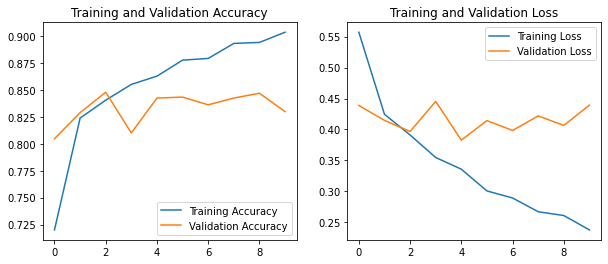

In [30]:
acc = m.history['accuracy']
val_acc = m.history['val_accuracy']

loss = m.history['loss']
val_loss = m.history['val_loss']

epochs=10
epochs_range = range(epochs)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy') 
plt.plot(epochs_range, val_acc, label='Validation Accuracy')  
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

# InceptionV3

In [31]:
model_5 = InceptionV3(weights='imagenet', include_top=False, input_shape=(128, 128, 3))  

# Freeze convolutional layers
for layer in model_5.layers:
    layer.trainable = False  
model = model_5.output

model = Flatten(name = "flatten")(model)
model = Dense(2,activation='sigmoid')(model)
model = Dense(100, activation='relu')(model) 
model = Dense(128, activation='relu')(model)
model= Dropout(0.5)(model)
model = Dense(2, activation='softmax')(model)

model_5= Model(inputs=model_5.input, outputs=model)
model_5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_5.summary()



Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 63, 63, 32)   864         ['input_6[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 63, 63, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                            

In [32]:
o=model_5.fit(X_train, y_train, validation_data=(X_val,y_val),epochs=10)


Epoch 1/10
139/139 [==============================] - 50s 335ms/step - loss: 0.6809 - accuracy: 0.5833 - val_loss: 0.6780 - val_accuracy: 0.5878
Epoch 2/10
139/139 [==============================] - 50s 360ms/step - loss: 0.6800 - accuracy: 0.5876 - val_loss: 0.6785 - val_accuracy: 0.5878
Epoch 3/10
139/139 [==============================] - 53s 384ms/step - loss: 0.6802 - accuracy: 0.5869 - val_loss: 0.6789 - val_accuracy: 0.5878
Epoch 4/10
139/139 [==============================] - 54s 391ms/step - loss: 0.6800 - accuracy: 0.5869 - val_loss: 0.6782 - val_accuracy: 0.5878
Epoch 5/10
139/139 [==============================] - 56s 403ms/step - loss: 0.6801 - accuracy: 0.5869 - val_loss: 0.6778 - val_accuracy: 0.5878
Epoch 6/10
139/139 [==============================] - 56s 404ms/step - loss: 0.6801 - accuracy: 0.5869 - val_loss: 0.6781 - val_accuracy: 0.5878
Epoch 7/10
139/139 [==============================] - 55s 399ms/step - loss: 0.6796 - accuracy: 0.5869 - val_loss: 0.6782 - val_ac

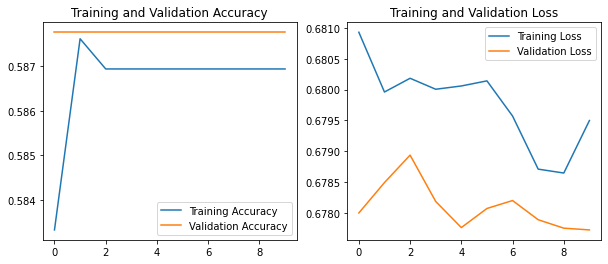

In [33]:
acc = o.history['accuracy']
val_acc = o.history['val_accuracy']

loss = o.history['loss']
val_loss = o.history['val_loss']

epochs=10
epochs_range = range(epochs)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy') 
plt.plot(epochs_range, val_acc, label='Validation Accuracy')  
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()